In [1]:
import sys
sys.path.insert(1,'../')
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.visualization.visualize import *
import glob
import pathlib
import numpy as np
import random

In [2]:
random.seed(10)

In [3]:
data = (pd.read_csv("../scratch_pad/csv_files/new_merged.csv"))

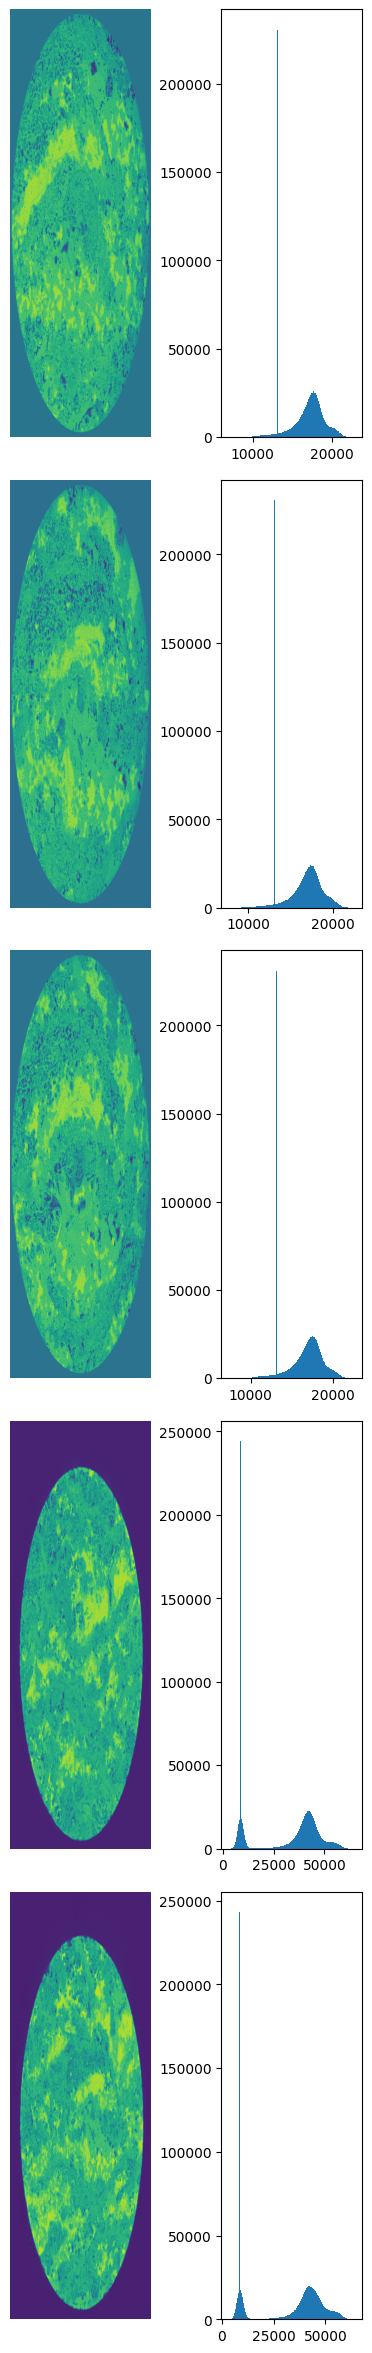

In [4]:
plot_images_histogram(data,5,'filename')

In [5]:
# Create an empty list to store the image metadata
data_dict = {}
# Search for TIFF image files in the directory
for image_path in glob.glob("../scratch_pad/data/Pairs-Image-resolution/15-97-15-Avg10-30VS-recon/*.tif"):
    # Open the image file
    image = Image.open(image_path)
    numpy_image =  np.asarray(image)
    data_dict[pathlib.Path(image_path).name] = numpy_image
    
for image_path in glob.glob("../scratch_pad/data/Pairs-Image-resolution/15-95-15-15VS-VOI-macro-1-recon/*.tif"):
    # Open the image file
    image = Image.open(image_path)
    numpy_image =  np.asarray(image)
    data_dict[pathlib.Path(image_path).name] = numpy_image

In [44]:
from tqdm import tqdm
def calculate_mean_std_with_variance(data_dict,merged_df,n_batches_in_iter=500,n_iter=40):
    all_all_mean=[]
    all_all_std=[]
    for _ in tqdm(range(n_iter)):
        all_mean=[]
        all_std=[]
        random_1 = np.random.randint(0,700,size=n_batches_in_iter//2)
        random_2 = np.random.randint(800,1506,size = n_batches_in_iter//2)
        randoms = np.concatenate([random_1,random_2])
        for r in tqdm((randoms)):
            mean= (data_dict[merged_df.iloc[r]['filename']]/1000).mean()
            all_mean.append(mean)
            std= (data_dict[merged_df.iloc[r]['filename']]/1000).std()
            all_std.append(std)
        avg_mean=sum(all_mean)/(len(all_mean))
        avg_std=sum(all_std)/(len(all_std))
        all_all_mean.append(avg_mean)
        all_all_std.append(avg_std)
    return all_all_mean,all_all_std

all_mean,all_std = calculate_mean_std_with_variance(data_dict,data)

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [01:42<00:00,  2.56s/it]


In [45]:
mean = np.median(np.asarray(all_mean)) * 1000
std = np.median(np.asanyarray(all_std)) *1000

In [104]:
mean,std

(22468.581881998216, 9959.62353797394)

In [7]:
keys = list(data_dict.keys())

28796.733839233388 17373.005369304476


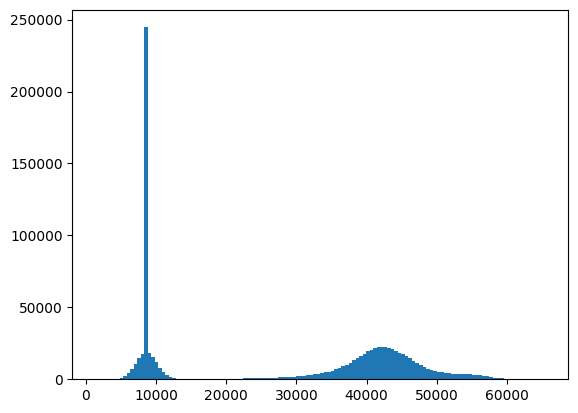

In [27]:
idx = 50
norm = (data_dict[keys[idx]])
plt.hist(norm.flatten(),bins=128)
print(norm.mean(),norm.std())

29448.863448304357 17996.85170193218


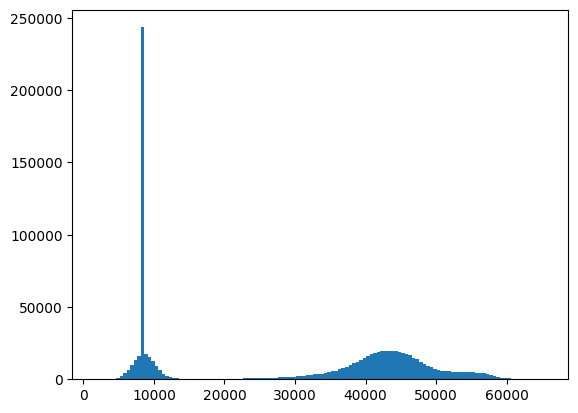

In [20]:
idx = 100
norm = (data_dict[keys[idx]])
plt.hist(norm.flatten(),bins=128)
print(norm.mean(),norm.std())

16061.182881890569 2345.225174473264


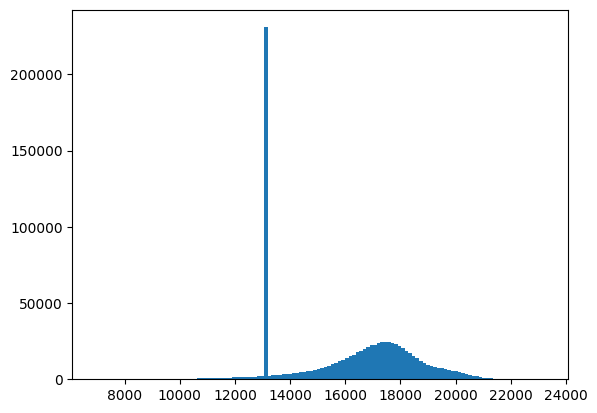

In [21]:
idx = 1000
norm = (data_dict[keys[idx]])
plt.hist(norm.flatten(),bins=128)
print(norm.mean(),norm.std())

16173.860090618378 2456.190138741925


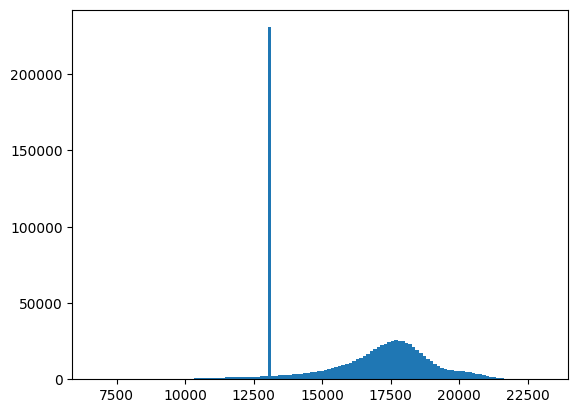

In [22]:
idx = 1500
norm = ((data_dict[keys[idx]]))
plt.hist(norm.flatten(),bins=128)
print(norm.mean(),norm.std())